# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint as pprint
from scipy.stats import linregress
#from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
p1 = 'q='
p2 = '&appid='
p3 = '&units='
units = 'metric'

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{p1}{city}{p2}{weather_api_key}{p3}{units}"    # YOUR CODE HERE
    
       
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()  # YOUR CODE HERE
        
               
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']      # YOUR CODE HERE
        city_lng = city_weather['coord']['lon']      # YOUR CODE HERE
        city_max_temp = city_weather['main']['temp_max']  # YOUR CODE HERE
        city_humidity = city_weather['main']['humidity']      # YOUR CODE HERE
        city_clouds = city_weather['clouds']['all']       # YOUR CODE HERE
        city_wind = city_weather['wind']['speed']         # YOUR CODE HERE
        city_country = city_weather['sys']['country']     # YOUR CODE HERE
        city_date = city_weather['dt']                    # YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })
        
        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bardai
Processing Record 2 of Set 1 | tambopata
Processing Record 3 of Set 1 | socorro
Processing Record 4 of Set 1 | veraval
Processing Record 5 of Set 1 | behshahr
Processing Record 6 of Set 1 | coquimbo
Processing Record 7 of Set 1 | christchurch
Processing Record 8 of Set 1 | suntar
Processing Record 9 of Set 1 | susuman
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | zlynka
Processing Record 12 of Set 1 | nelson bay
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | kingisepp
Processing Record 15 of Set 1 | papatowai
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | khanty-mansiysk
Processing Record 18 of Set 1 | adiyaman
Processing Record 19 of Set 1 | sungailiat
Processing Record 20 of Set 1 | bilibino
Processing Record 21 of Set 1 | hawaiian paradise park
Processing Record 22 of Set 1 | qaqortoq
P

Processing Record 40 of Set 4 | i-n-salah
Processing Record 41 of Set 4 | ribeira grande
Processing Record 42 of Set 4 | afaahiti
Processing Record 43 of Set 4 | mont-laurier
Processing Record 44 of Set 4 | necochea
Processing Record 45 of Set 4 | longyearbyen
Processing Record 46 of Set 4 | keflavik
Processing Record 47 of Set 4 | khandyga
Processing Record 48 of Set 4 | dampit
Processing Record 49 of Set 4 | dauphin
Processing Record 0 of Set 5 | aral
Processing Record 1 of Set 5 | tame
Processing Record 2 of Set 5 | west plains
Processing Record 3 of Set 5 | bairnsdale
Processing Record 4 of Set 5 | salalah
Processing Record 5 of Set 5 | san pedro
Processing Record 6 of Set 5 | port alfred
Processing Record 7 of Set 5 | kapa'a
Processing Record 8 of Set 5 | haiku-pauwela
Processing Record 9 of Set 5 | mar del plata
Processing Record 10 of Set 5 | selkirk
Processing Record 11 of Set 5 | manicore
Processing Record 12 of Set 5 | kankan
Processing Record 13 of Set 5 | mount isa
Processi

Processing Record 32 of Set 8 | nar'yan-mar
Processing Record 33 of Set 8 | ekibastuz
Processing Record 34 of Set 8 | lesnoy
Processing Record 35 of Set 8 | manado
Processing Record 36 of Set 8 | candelaria
Processing Record 37 of Set 8 | ishigaki
Processing Record 38 of Set 8 | villa del totoral
Processing Record 39 of Set 8 | rabo de peixe
Processing Record 40 of Set 8 | fuvahmulah
City not found. Skipping...
Processing Record 41 of Set 8 | maine soroa
Processing Record 42 of Set 8 | katiola
Processing Record 43 of Set 8 | stephenville
Processing Record 44 of Set 8 | mazatan
Processing Record 45 of Set 8 | chui
Processing Record 46 of Set 8 | alta
Processing Record 47 of Set 8 | mili
Processing Record 48 of Set 8 | murzuq
Processing Record 49 of Set 8 | pengcheng
Processing Record 0 of Set 9 | port saint john's
Processing Record 1 of Set 9 | dayton
Processing Record 2 of Set 9 | husum
Processing Record 3 of Set 9 | morondava
Processing Record 4 of Set 9 | yeniseysk
Processing Record 

Processing Record 21 of Set 12 | meadow lake
Processing Record 22 of Set 12 | nizhnesortymskiy
Processing Record 23 of Set 12 | kavieng
Processing Record 24 of Set 12 | namsos
Processing Record 25 of Set 12 | aripuana
Processing Record 26 of Set 12 | lokken
City not found. Skipping...
Processing Record 27 of Set 12 | sorong
Processing Record 28 of Set 12 | betio village
Processing Record 29 of Set 12 | antsiranana
Processing Record 30 of Set 12 | korla
Processing Record 31 of Set 12 | saint-leu
Processing Record 32 of Set 12 | nadi
Processing Record 33 of Set 12 | nantucket
Processing Record 34 of Set 12 | severo-yeniseyskiy
Processing Record 35 of Set 12 | chern'
Processing Record 36 of Set 12 | ayaguz
City not found. Skipping...
Processing Record 37 of Set 12 | suva
Processing Record 38 of Set 12 | calhoun
Processing Record 39 of Set 12 | okuta
Processing Record 40 of Set 12 | cherykaw
Processing Record 41 of Set 12 | yagry
City not found. Skipping...
Processing Record 42 of Set 12 |

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)    # YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [46]:
# Display sample data
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bardai,11.6500,7.2333,28.96,37,99,3.10,NG,1681866592
1,tambopata,-12.7333,-69.1833,23.82,88,81,0.59,PE,1681866593
2,socorro,31.6546,-106.3033,27.55,7,20,7.72,US,1681866593
3,veraval,20.9000,70.3667,26.54,62,45,4.28,IN,1681866593
4,behshahr,36.6923,53.5526,11.33,79,0,1.20,IR,1681866593
...,...,...,...,...,...,...,...,...,...
567,oamaru,-45.0784,170.9801,15.21,80,99,2.55,NZ,1681866593
568,bo phloi,14.3236,99.5161,28.60,62,79,3.39,TH,1681866774
569,tulun,54.5611,100.5792,-2.39,33,87,6.65,RU,1681866774


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bardai,11.6500,7.2333,28.96,37,99,3.10,NG,1681866592
1,tambopata,-12.7333,-69.1833,23.82,88,81,0.59,PE,1681866593
2,socorro,31.6546,-106.3033,27.55,7,20,7.72,US,1681866593
3,veraval,20.9000,70.3667,26.54,62,45,4.28,IN,1681866593
4,behshahr,36.6923,53.5526,11.33,79,0,1.20,IR,1681866593


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

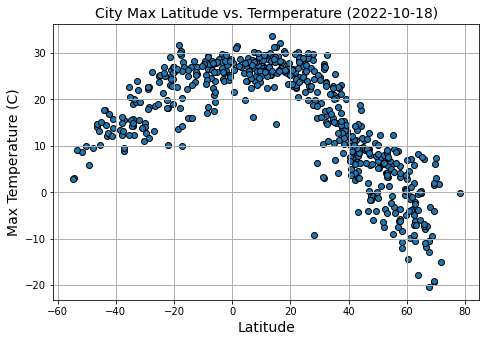

In [9]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors = "black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Max Temperature (C)', fontsize=14)
plt.title('City Max Latitude vs. Termperature (2022-10-18)', fontsize=14) 
plt.grid(linestyle='-', linewidth=1)
plt.tight_layout(pad=-2)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

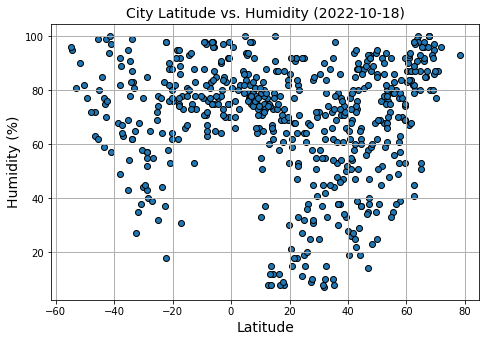

In [10]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors = "black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Humidity (%)', fontsize=14)
plt.title('City Latitude vs. Humidity (2022-10-18)', fontsize=14) 
plt.grid(linestyle='-', linewidth=1)
plt.tight_layout(pad=-2)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

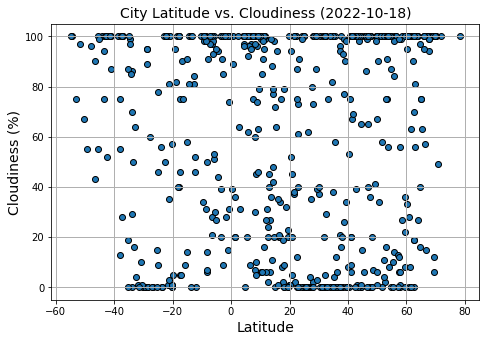

In [11]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors = "black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Cloudiness (%)', fontsize=14)
plt.title('City Latitude vs. Cloudiness (2022-10-18)', fontsize=14) 
plt.grid(linestyle='-', linewidth=1)
plt.tight_layout(pad=-2)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

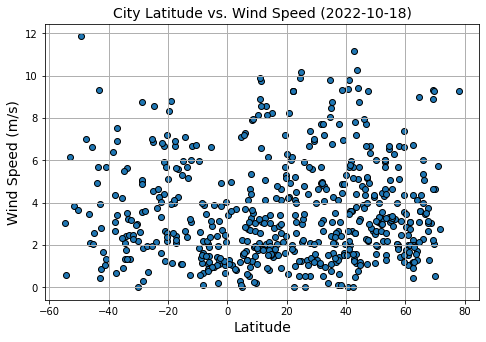

In [12]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors = "black")


# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Wind Speed (m/s)', fontsize=14)
plt.title('City Latitude vs. Wind Speed (2022-10-18)', fontsize=14) 
plt.grid(linestyle='-', linewidth=1)
plt.tight_layout(pad=-2)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [78]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

#(slope, intercept, rvalue, pvalue, stderr) = linregress(city_data_df["Lat"], city_data_df["Max Temp"])
#print(slope)

def graph_reg(x_axis,y_axis,summary_val):
    
    print(len(x_axis))
    print(len(y_axis))
    print(summary_val)
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
    
    print("---SLOPE--------------")
    print(slope)
    
    regress = x_axis*slope+intercept
    
       
    line_eq = f"y = {round(slope, 2)}x + {round(intercept,2)}"  
    print (line_eq)    
    print(f"The r-value is: {rvalue**2}")
    
    x=np.array(x_axis)
    y=np.array(regress)
    
    
   
    plt.xlabel('Latitude')
    plt.ylabel(summary_val)
    
        
       
    plt.scatter(x_axis,y_axis)
    
     
    
    plt.plot(x, y, color = 'red')

              
    plt.show()
    
    return 0





In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

northern_hemi_df = city_data_df[(city_data_df["Lat"] >= 0)]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bardai,11.6500,7.2333,28.96,37,99,3.10,NG,1681866592
2,socorro,31.6546,-106.3033,27.55,7,20,7.72,US,1681866593
3,veraval,20.9000,70.3667,26.54,62,45,4.28,IN,1681866593
4,behshahr,36.6923,53.5526,11.33,79,0,1.20,IR,1681866593
7,suntar,62.1444,117.6319,-3.73,82,90,1.15,RU,1681866594


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

southern_hemi_df = city_data_df[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tambopata,-12.7333,-69.1833,23.82,88,81,0.59,PE,1681866593
5,coquimbo,-29.9533,-71.3436,14.85,77,0,0.00,CL,1681866033
6,christchurch,-43.5333,172.6333,17.73,77,75,5.66,NZ,1681866355
9,adamstown,-25.0660,-130.1015,24.95,74,46,6.84,PN,1681866594
11,nelson bay,-32.7167,152.1500,23.94,65,64,1.34,AU,1681866595


###  Temperature vs. Latitude Linear Regression Plot

406
406
Maximum Temperature
---SLOPE--------------
-0.5804694763862668
y = -0.58x + 34.63
The r-value is: 0.789326203790843


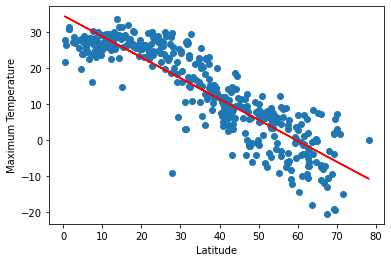

0

In [80]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE



graph_reg(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],'Maximum Temperature')

y = -0.58x + 34.63
The r-value is: + 0.789326203790843


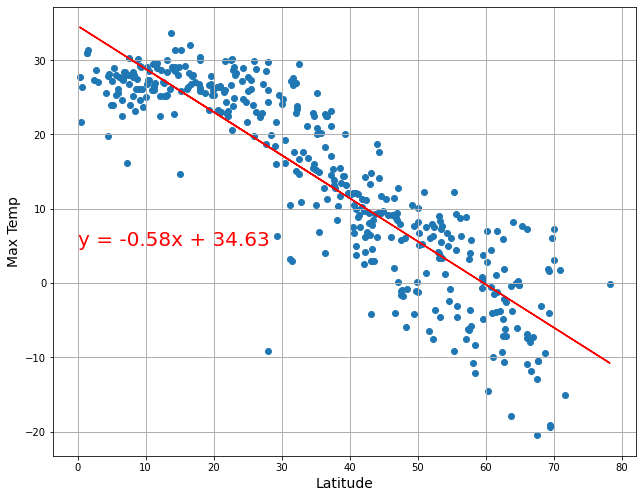

In [17]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE


(slope, intercept, rvalue, pvalue, stderrr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

regress_values = slope * northern_hemi_df["Lat"] + intercept


line_eq = f"y = {round(slope, 2)}x + {round(intercept,2)}"
print(line_eq)

r_square = f"The r-value is: + {rvalue**2}"
print(r_square)


plt.annotate(line_eq , (0,5), color = 'red', fontsize=20)


plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Max Temp', fontsize=14)
plt.grid(linestyle='-', linewidth=1)
plt.tight_layout(pad=-10)



N_lat = northern_hemi_df["Lat"]


plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

x=np.array(northern_hemi_df["Lat"])
y=np.array(regress_values)


plt.plot(x, y, color = 'red')


# Show plot
plt.show()




166
166
Maximum Temperature
---SLOPE--------------
0.35359078209977146
y = 0.35x + 28.66
The r-value is: 0.6054643914355544


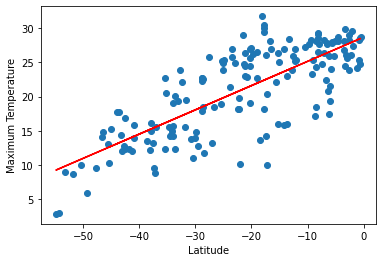

0

In [81]:
graph_reg(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],'Maximum Temperature')

y = 0.35x + 28.66
The r-value is: + 0.6054643914355544


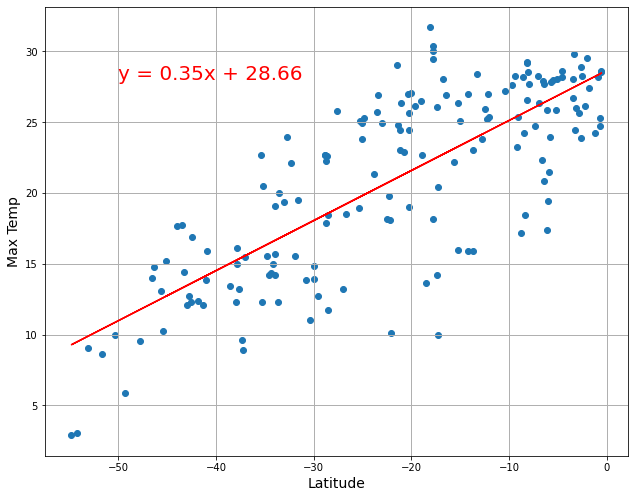

In [18]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

(slope, intercept, rvalue, pvalue, stderrr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

regress_values = slope * southern_hemi_df["Lat"] + intercept


line_eq = f"y = {round(slope, 2)}x + {round(intercept,2)}"
print(line_eq)

r_square = f"The r-value is: + {rvalue**2}"
print(r_square)

plt.annotate(line_eq , (-50,28), color = 'red', fontsize=20)



plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Max Temp', fontsize=14)
plt.grid(linestyle='-', linewidth=1)
plt.tight_layout(pad=-10)

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])


x=np.array(southern_hemi_df["Lat"])
y=np.array(regress_values)


plt.plot(x, y, color = 'red')


# Show plot
plt.show()


**Discussion about the linear relationship:** Based on linear regression of both Northern and Southern hemisphere city data , the cities further away from the equator , Latitude = 0 , are shown to have lower temperatures , where the Maximum Temperature decreases when further away from the equator .

### Humidity vs. Latitude Linear Regression Plot

406
406
Humidity
---SLOPE--------------
0.17591731611901987
y = 0.18x + 60.44
The r-value is: 0.021525354620900123


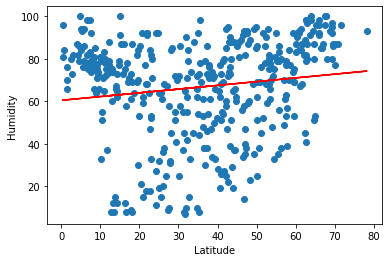

0

In [82]:
graph_reg(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],'Humidity')

y = 0.25x + 59.69
The r-value is: + 0.04808979404517837


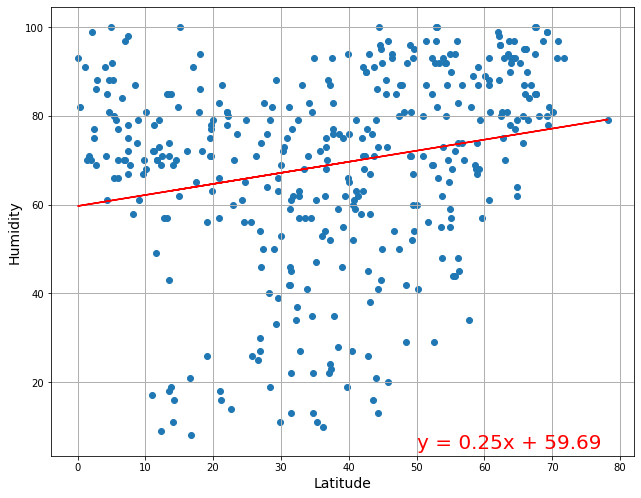

In [69]:
# Northern Hemisphere
# YOUR CODE HERE

(slope, intercept, rvalue, pvalue, stderrr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

regress_values = slope * northern_hemi_df["Lat"] + intercept


line_eq = f"y = {round(slope, 2)}x + {round(intercept,2)}"
print(line_eq)

r_square = f"The r-value is: + {rvalue**2}"
print(r_square)

plt.annotate(line_eq , (50,5), color = 'red', fontsize=20)


plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Humidity', fontsize=14)
plt.grid(linestyle='-', linewidth=1)
plt.tight_layout(pad=-10)


plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

x=np.array(northern_hemi_df["Lat"])
y=np.array(regress_values)


plt.plot(x, y, color = 'red')




# Show plot
plt.show()


166
166
Humidity
---SLOPE--------------
0.18071499902395557
y = 0.18x + 78.77
The r-value is: 0.02389732757954558


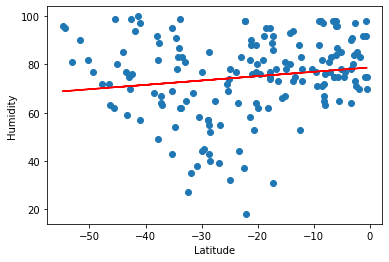

0

In [83]:
graph_reg(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],'Humidity')

y = 0.18x + 78.77
The r-value is: + 0.02389732757954558


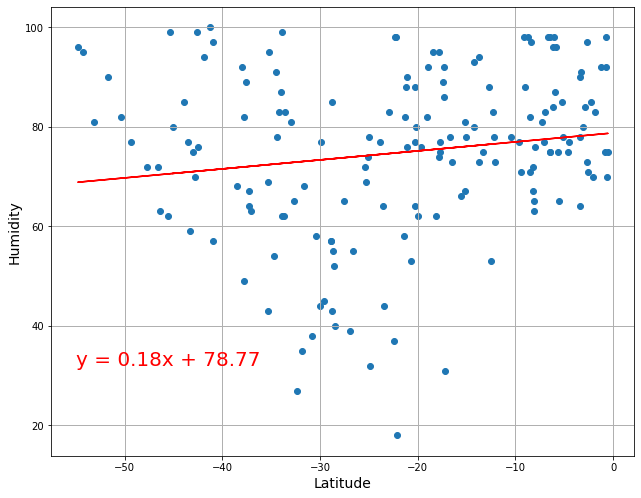

In [19]:
# Southern Hemisphere
# YOUR CODE HERE

(slope, intercept, rvalue, pvalue, stderrr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

regress_values = slope * southern_hemi_df["Lat"] + intercept


line_eq = f"y = {round(slope, 2)}x + {round(intercept,2)}"
print(line_eq)

r_square = f"The r-value is: + {rvalue**2}"
print(r_square)

plt.annotate(line_eq , (-55,32), color = 'red', fontsize=20)



plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Humidity', fontsize=14)
plt.grid(linestyle='-', linewidth=1)
plt.tight_layout(pad=-10)


plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])


x=np.array(southern_hemi_df["Lat"])
y=np.array(regress_values)

plt.plot(x, y, color = 'red')



# Show plot
plt.show()



**Discussion about the linear relationship:** There does not seem to be a correlation between humidity and Latitude for the city data . Perhaps an altitude indication would be a better predictor of humidity near the equator .

### Cloudiness vs. Latitude Linear Regression Plot

406
406
Cloudiness
---SLOPE--------------
0.20911315677573908
y = 0.21x + 49.1
The r-value is: 0.009495430266171579


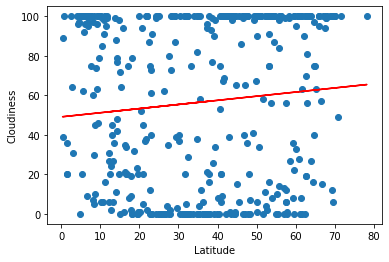

0

In [84]:
graph_reg(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],'Cloudiness')

y = 0.21x + 49.1
The r-value is: + 0.009495430266171579


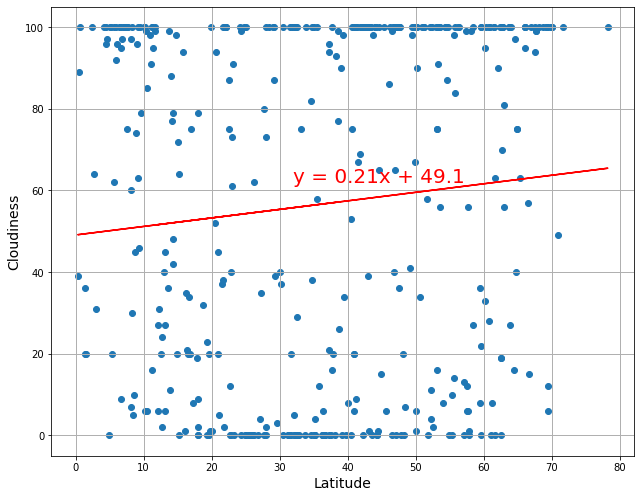

In [20]:
# Northern Hemisphere
# YOUR CODE HERE

(slope, intercept, rvalue, pvalue, stderrr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

regress_values = slope * northern_hemi_df["Lat"] + intercept


line_eq = f"y = {round(slope, 2)}x + {round(intercept,2)}"
print(line_eq)

r_square = f"The r-value is: + {rvalue**2}"
print(r_square)

plt.annotate(line_eq , (32,62), color = 'red', fontsize=20)


plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Cloudiness', fontsize=14)
plt.grid(linestyle='-', linewidth=1)
plt.tight_layout(pad=-10)


plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

x=np.array(northern_hemi_df["Lat"])
y=np.array(regress_values)

plt.plot( x, y, color = 'red')


# Show plot
plt.show()


166
166
Cloudiness
---SLOPE--------------
-0.011349809770052378
y = -0.01x + 60.41
The r-value is: 1.714901173519957e-05


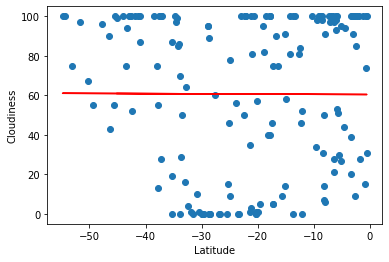

0

In [85]:
graph_reg(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],'Cloudiness')

y = -0.01x + 60.41
The r-value is: + 1.714901173519957e-05


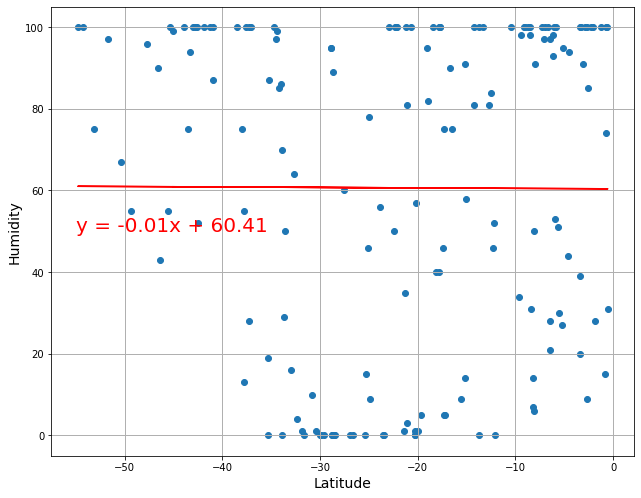

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

(slope, intercept, rvalue, pvalue, stderrr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

regress_values = slope * southern_hemi_df["Lat"] + intercept


line_eq = f"y = {round(slope, 2)}x + {round(intercept,2)}"
print(line_eq)

r_square = f"The r-value is: + {rvalue**2}"
print(r_square)

plt.annotate(line_eq , (-55,50), color = 'red',fontsize=20)


plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Humidity', fontsize=14)
plt.grid(linestyle='-', linewidth=1)
plt.tight_layout(pad=-10)


plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])


x=np.array(southern_hemi_df["Lat"])
y=np.array(regress_values)

plt.plot( x, y, color = 'red')


# Show plot
plt.show()



**Discussion about the linear relationship:** There is little correlation between cloudiness and latitude , especially for the Southern Hemisphere .

### Wind Speed vs. Latitude Linear Regression Plot

406
406
Wind Speed
---SLOPE--------------
0.007686755465541262
y = 0.01x + 3.34
The r-value is: 0.0038239685459429654


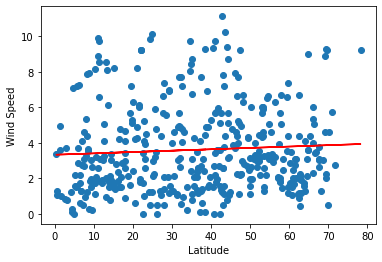

0

In [86]:
graph_reg(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],'Wind Speed')

y = 0.01x + 3.34
The r-value is: + 0.0038239685459429654


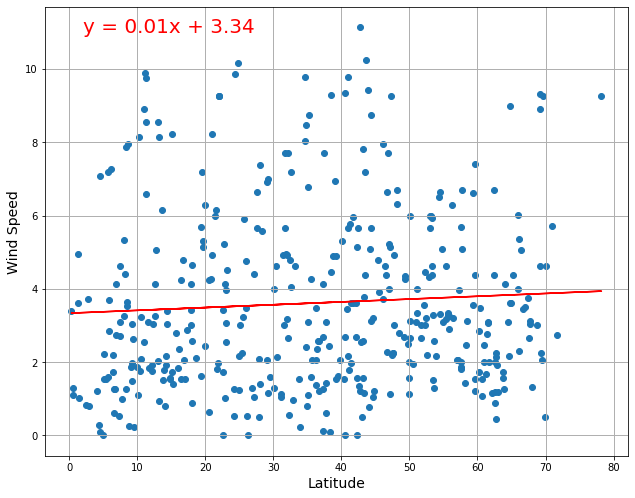

In [23]:
# Northern Hemisphere
# YOUR CODE HERE

(slope, intercept, rvalue, pvalue, stderrr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

regress_values = slope * northern_hemi_df["Lat"] + intercept


line_eq = f"y = {round(slope, 2)}x + {round(intercept,2)}"
print(line_eq)

r_square = f"The r-value is: + {rvalue**2}"
print(r_square)

plt.annotate(line_eq , (2,11), color = 'red',fontsize=20)


plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Wind Speed', fontsize=14)
plt.grid(linestyle='-', linewidth=1)
plt.tight_layout(pad=-10)



plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

x=np.array(northern_hemi_df["Lat"])
y=np.array(regress_values)


plt.plot( x, y, color = 'red')


# Show plot
plt.show()

166
166
Wind Speed
---SLOPE--------------
-0.0354102777121921
y = -0.04x + 2.58
The r-value is: 0.05176032738549653


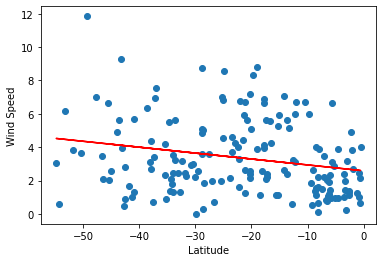

0

In [87]:
graph_reg(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],'Wind Speed')

y = -0.04x + 2.58
The r-value is: + 0.05176032738549653


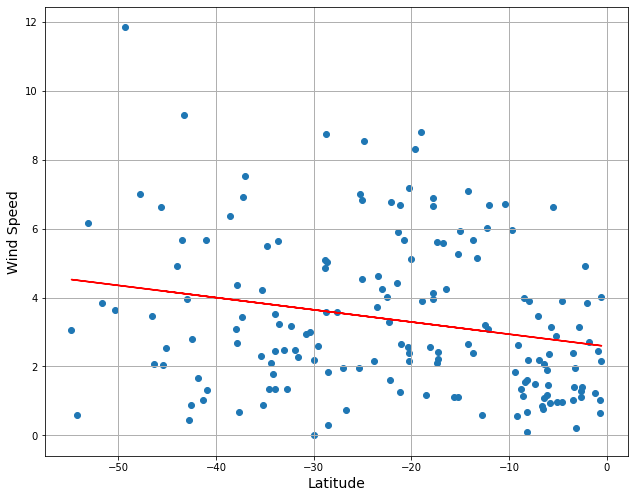

In [24]:
# Southern Hemisphere
# YOUR CODE HERE

(slope, intercept, rvalue, pvalue, stderrr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

regress_values = slope * southern_hemi_df["Lat"] + intercept


line_eq = f"y = {round(slope, 2)}x + {round(intercept,2)}"
print(line_eq)

r_square = f"The r-value is: + {rvalue**2}"
print(r_square)

plt.annotate(line_eq , (20,5), color = 'red')

plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Wind Speed', fontsize=14)
plt.grid(linestyle='-', linewidth=1)
plt.tight_layout(pad=-10)


plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

x=np.array(southern_hemi_df["Lat"])
y=np.array(regress_values)

plt.plot( x, y, color = 'red')

# Show plot
plt.show()



**Discussion about the linear relationship:** There is a small correlation between latitude and wind speed so that the further away from the equator , the greater the wind speed . Colonists would call the area around the equator "the doldrums" to indicate a lack of wind speed to power their sailing ships .